In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os,sys
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from  sklearn.svm import  LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from matplotlib import colors

from sklearn.decomposition import PCA

In [20]:
file="LeadII_Table"
df=pd.read_excel("LeadII_Table.xlsx",header=0) 

Data is split in train and test, with train size as 80% and test size as 20%.

In [21]:
X=np.array(df.iloc[:,:15])
y=np.array(df.iloc[:,15])

In [22]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_scaled=X # X_scaled=sc.fit_transform(X)

In [23]:
lda = LDA(solver="svd", store_covariance=True)
knn = KNeighborsClassifier(n_neighbors=5, weights="distance") 
logreg = LogisticRegression(solver="liblinear")

In [24]:
from sklearn.model_selection import cross_val_score

def cross_val(model, X, y, cv=5):
    scores = cross_val_score(model,X,y,cv=5)
    print("Cross-validation scores: {}".format(scores))
    return print("Average cross-validation score: {:.2f}".format(scores.mean()))

In [25]:
def train_and_plot_princ_comp(model, X, y, n_components=2):

    pca = PCA(n_components=n_components)
    X_pca = pca.fit(X).transform(X)    

    model.fit(X_pca, y)
    y_pred=model.predict(X_pca)
    
    tp = (y == y_pred)  # True Positive
    tp0, tp1 = tp[y == "Control"], tp[y == "MI"]
    X0, X1 = X_pca[y == "Control"], X_pca[y == "MI"]
    X0_tp, X0_fp = X0[tp0], X0[~tp0]
    X1_tp, X1_fp = X1[tp1], X1[~tp1]

    # class 0: dots
    plt.figure(figsize=(20,10))
    plt.xlabel("First principal component", fontsize=18)
    plt.ylabel("Second principal component", fontsize=18)
    plt.scatter(X0_tp[:, 0], X0_tp[:, 1], marker='o', color='red', label='Control')
    plt.scatter(X0_fp[:, 0], X0_fp[:, 1], marker='x', s=100, color='#990000')  # dark red

    # class 1: dots
    plt.scatter(X1_tp[:, 0], X1_tp[:, 1], marker='o', color='blue', label='MI')
    plt.scatter(X1_fp[:, 0], X1_fp[:, 1], marker='x', s=100, color='#000099')  # dark blue
    
    plt.legend()
    
    cross_val(model, X_pca, y)
    

Cross-validation scores: [0.55 0.85 0.85 0.55 0.8 ]
Average cross-validation score: 0.72


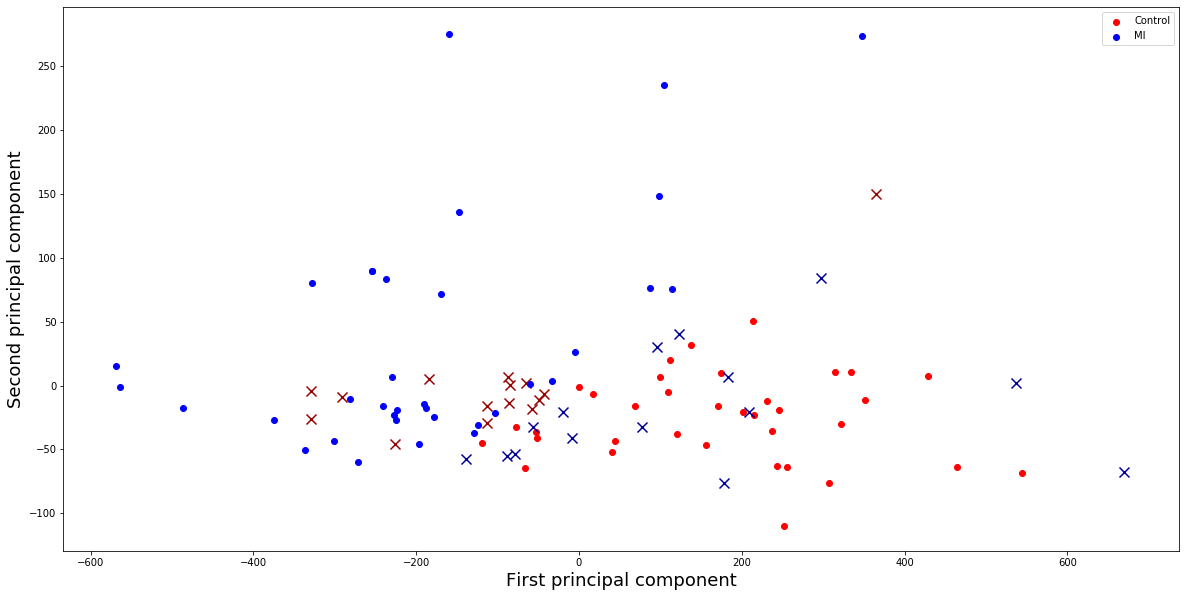

In [26]:
train_and_plot_princ_comp(lda, X_scaled, y, n_components=2)

Cross-validation scores: [0.55 0.55 0.7  0.65 0.6 ]
Average cross-validation score: 0.61


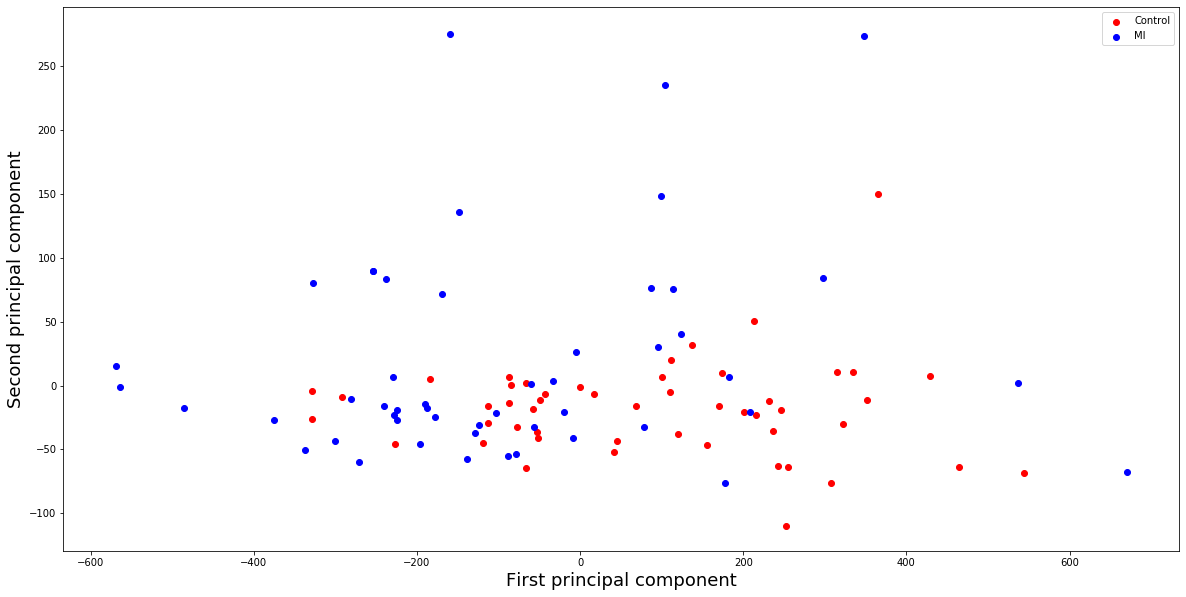

In [27]:
train_and_plot_princ_comp(knn, X_scaled, y, n_components=2)

Cross-validation scores: [0.55 0.85 0.85 0.55 0.8 ]
Average cross-validation score: 0.72


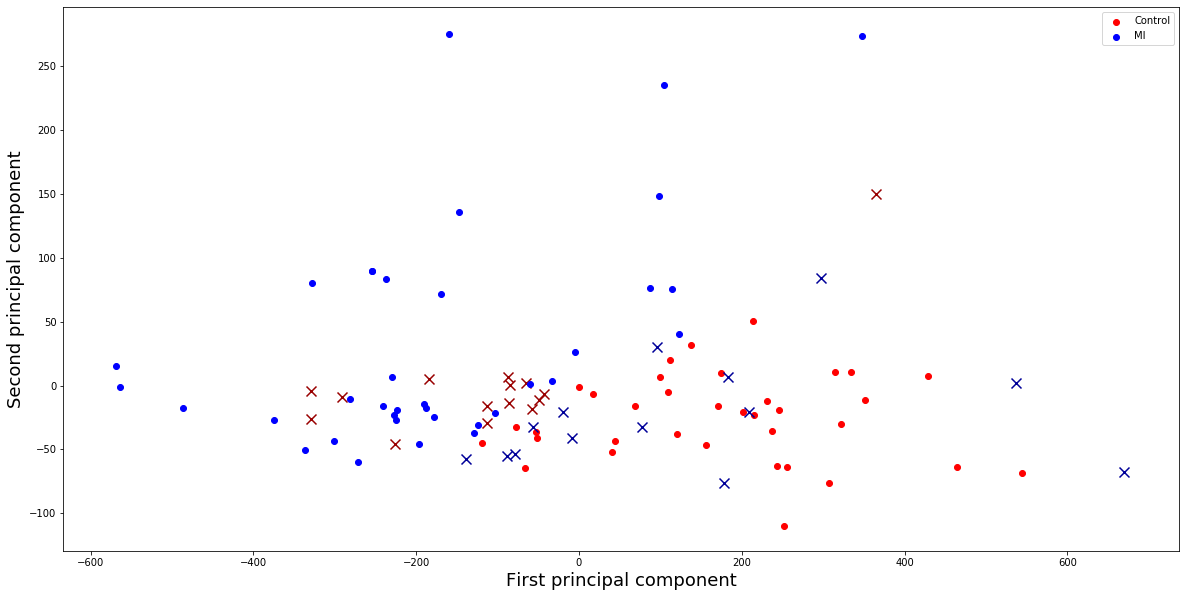

In [28]:
train_and_plot_princ_comp(logreg, X, y, n_components=2)